![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto

### 3.0 Extração dos dados

In [212]:
# Importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [160]:
# Extração dos dados
df = pd.read_csv('Churn_Modelling.csv')

### 3.1 Análise exploratória

In [161]:
# Entender quantidade de dados
print(f'O conjunto de dados possui {df.shape[0]} linhas')
print(f'O conjunto de dados possui {df.shape[1]} colunas')
print()

# Visualizar as 5 primeiras entradas dos dados
df.head()

O conjunto de dados possui 10000 linhas
O conjunto de dados possui 14 colunas



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [162]:
# Vamos renomear as colunas para facilitar nas análises.
df.rename(columns={'RowNumber':'id_linha', 'CustomerId':'id_cliente',
                   'Surname':'sobrenome', 'CreditScore':'pontuacao_credito',
                   'Geography':'pais_origem', 'Gender':'genero',
                   'Age':'idade', 'Tenure':'tempo_cadastro_banco',
                   'Balance':'saldo_bancario', 'NumOfProducts':'qtd_produtos',
                   'HasCrCard':'possui_cartao', 'IsActiveMember':'cliente_ativo',
                   'EstimatedSalary':'salario_estimado', 'Exited':'conta_encerrada'                       
},inplace=True)

df.head()

,id_linha,id_cliente,sobrenome,pontuacao_credito,pais_origem,genero,idade,tempo_cadastro_banco,saldo_bancario,qtd_produtos,possui_cartao,cliente_ativo,salario_estimado,conta_encerrada
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [163]:
# Verificar se temos presença de dados nulos
df.isnull().sum().sort_values(ascending=False)

conta_encerrada         0
salario_estimado        0
cliente_ativo           0
possui_cartao           0
qtd_produtos            0
saldo_bancario          0
tempo_cadastro_banco    0
idade                   0
genero                  0
pais_origem             0
pontuacao_credito       0
sobrenome               0
id_cliente              0
id_linha                0
dtype: int64

Não temos dados nulos, o que aparenta ser um ótimo! 

In [164]:
# Verificar tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_linha              10000 non-null  int64  
 1   id_cliente            10000 non-null  int64  
 2   sobrenome             10000 non-null  object 
 3   pontuacao_credito     10000 non-null  int64  
 4   pais_origem           10000 non-null  object 
 5   genero                10000 non-null  object 
 6   idade                 10000 non-null  int64  
 7   tempo_cadastro_banco  10000 non-null  int64  
 8   saldo_bancario        10000 non-null  float64
 9   qtd_produtos          10000 non-null  int64  
 10  possui_cartao         10000 non-null  int64  
 11  cliente_ativo         10000 non-null  int64  
 12  salario_estimado      10000 non-null  float64
 13  conta_encerrada       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [165]:
# Verificar dados estatísticos descritivos
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id_linha,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
id_cliente,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
pontuacao_credito,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
idade,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tempo_cadastro_banco,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
saldo_bancario,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
qtd_produtos,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
possui_cartao,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
cliente_ativo,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
salario_estimado,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


De acordo com a tabela, aparentemente a variável `saldo_bancario` apresenta outliers. Vamos verificar essa variável de perto.

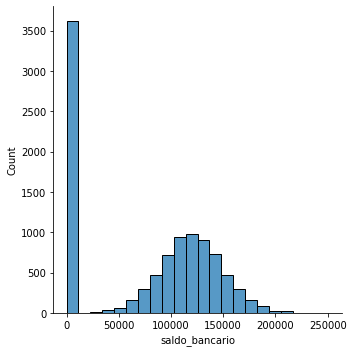

In [166]:
# Criar boxplot da variável saldo_bancario
sns.displot(df['saldo_bancario']);

Verificar em nossa variável target como está a distribuição de valores entre usuários que encerraram a conta.

0    0.7963
1    0.2037
Name: conta_encerrada, dtype: float64


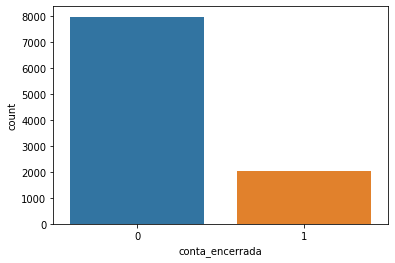

In [167]:
# Criar visualização deste resultado.
print(df['conta_encerrada'].value_counts(normalize=True))
sns.countplot(data=df, x='conta_encerrada');

Esse gráfico acima mostra que existe um certo desbalanceamento em relação ao dados e que pode impactar futuramente em nosso modelo, por este motivo, criaremos uma função para ajustar esse desbalanceamento.

In [168]:
# Criando função com intuito de ajustar o desbalanceamento dos dados.
def UnderOverSampling(dados, under = 1, over = 1):
  np.random.seed(42)
  classe0 = dados[dados['conta_encerrada']==0]
  classe1 = dados[dados['conta_encerrada']==1]

  amostra0 = classe0.sample(under * classe1.shape[0], replace=True)
  amostra1 = pd.concat([classe1]* over, ignore_index=True)

  tudo = pd.concat([amostra0, amostra1])

  return tudo

In [169]:
df_ajustado = UnderOverSampling(df, under=3, over = 2)

In [170]:
df_ajustado.head()

,id_linha,id_cliente,sobrenome,pontuacao_credito,pais_origem,genero,idade,tempo_cadastro_banco,saldo_bancario,qtd_produtos,possui_cartao,cliente_ativo,salario_estimado,conta_encerrada
9161,9162,15750049,Steele,621,France,Male,40,10,163823.37,1,0,0,89519.47,0
9567,9568,15696733,McKenzie,724,France,Male,29,4,0.00,1,1,0,8982.75,0
1083,1084,15692583,Udobata,678,France,Female,32,5,0.00,2,1,0,90284.47,0
6792,6793,15776096,Halpern,606,Spain,Male,34,3,161572.24,1,0,1,191076.22,0
6595,6596,15734948,Igwebuike,601,Spain,Male,24,7,0.00,2,0,0,144660.42,0


0    0.6
1    0.4
Name: conta_encerrada, dtype: float64


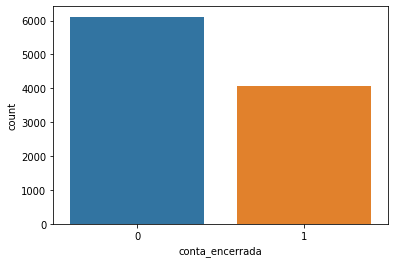

In [171]:
# Criar visualização deste resultado.
print(df_ajustado['conta_encerrada'].value_counts(normalize=True))
sns.countplot(data=df_ajustado, x='conta_encerrada');

Observamos que há uma grande quantidade de dados onde os usuários não possuem saldo bancário. Vamos verificar se apresenta algum impacto nas contas encerradas.

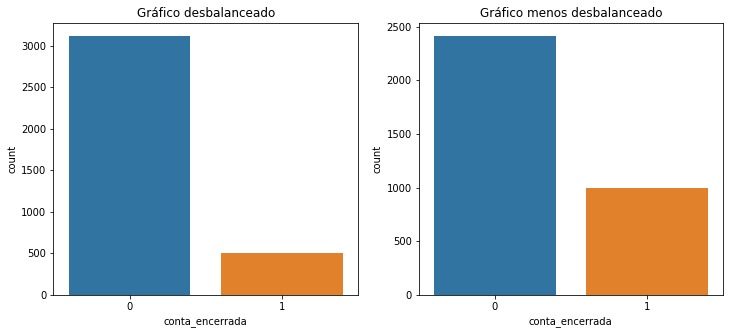

In [172]:
# Vamos analisar se há algum impacto no fechamento de conta em usuários que não possuem saldo bancário.
df_sem_saldo = df.query("saldo_bancario==0")
df_sem_saldo_2 = df_ajustado.query("saldo_bancario==0")

fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(12,5))

ax1.set_title('Gráfico desbalanceado')
sns.countplot(data=df_sem_saldo, x='conta_encerrada', ax=ax1)

ax2.set_title('Gráfico menos desbalanceado')
sns.countplot(data=df_sem_saldo_2, x='conta_encerrada', ax=ax2);

Não há um impacto forte nas contas encerradas, porém continua sendo um ponto de atenção essa quantidade de contas sem saldo, possivelmente criaremos uma coluna de verificação se há saldo ou não.

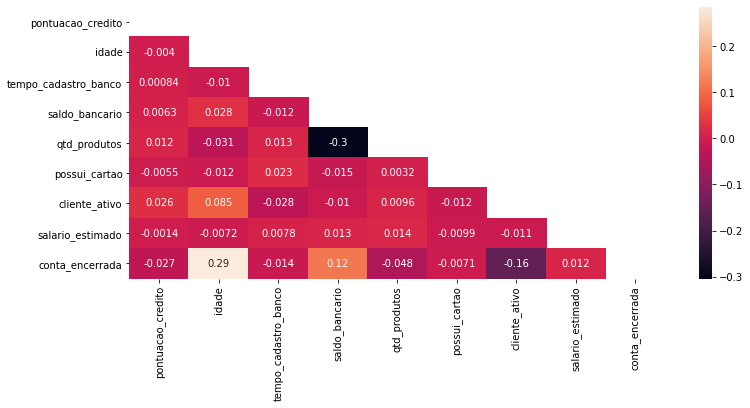

In [173]:
# Vamos entender como os dados se relacionam entre si
corr = df.iloc[:,2:].corr()

# plotar os dados de correlação
plt.figure(figsize=(12,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True,mask=mask);

Não há muita relação de nossa variável target (conta_encerrada) com as outras variáveis, com excessão da idade que apresenta 29%, porém ainda trata-se de uma correlação positiva fraca. Isso pode impactar na performance dos nossos modelos.

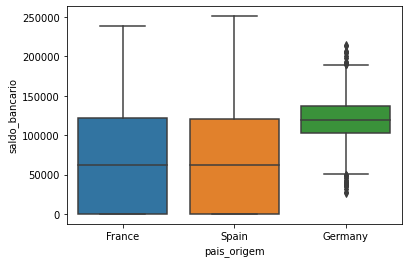

In [174]:
# Vamos verificar o saldo por país.
sns.boxplot(data=df, y='saldo_bancario', x='pais_origem');

In [175]:
# Análise se há alguma diferenciação na hora do encerramento da conta
df[['conta_encerrada','pais_origem', 'saldo_bancario']].groupby(['pais_origem','conta_encerrada']).mean()

saldo_bancario
pais_origem conta_encerrada                
France      0                  60339.275678
            1                  71192.795728
Germany     0                 119427.106696
            1                 120361.075590
Spain       0                  59678.070470
            1                  72513.352446

In [176]:
# Se há muita diferença na mediana para o encerramento das contas
df[['conta_encerrada','idade']].groupby(['conta_encerrada']).median()

,idade
conta_encerrada,
0,36
1,45


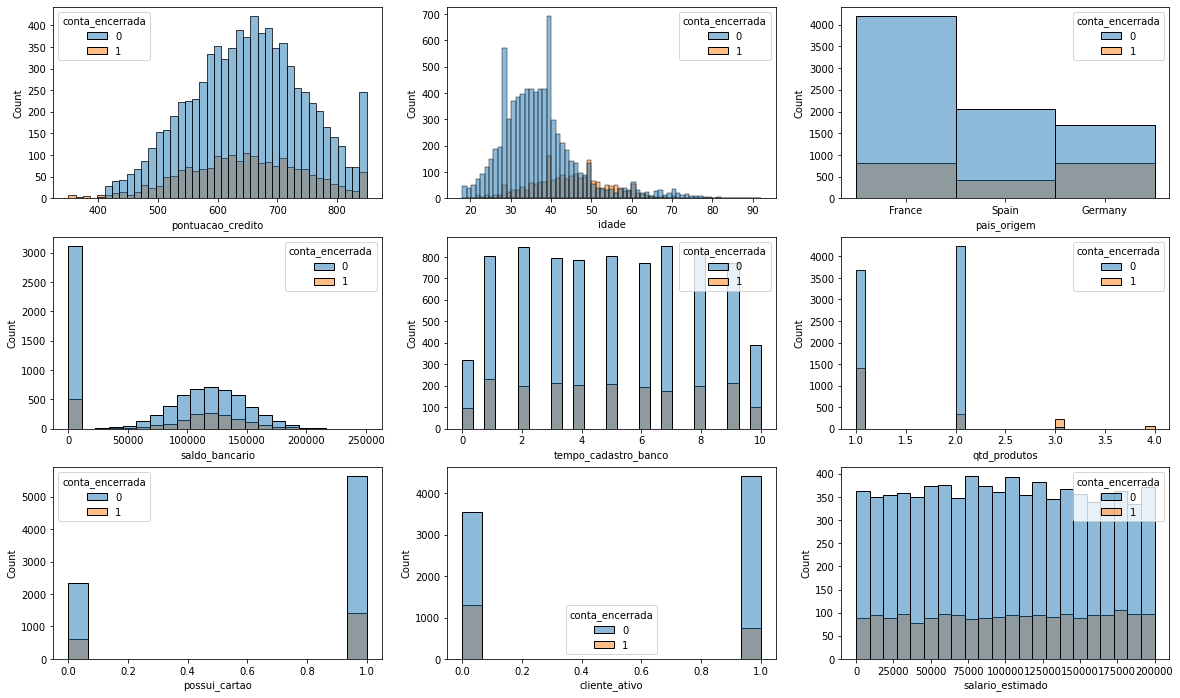

In [177]:
variaveis = ['pontuacao_credito', 'idade', 'pais_origem', 'saldo_bancario', 'tempo_cadastro_banco', 'qtd_produtos', 'possui_cartao', 'cliente_ativo', 'salario_estimado']
plt.figure(figsize=(20,12))

for indice, coluna in enumerate(variaveis):
  plt.subplot(3, 3, indice+1)  
  sns.histplot(data=df, x=coluna, hue='conta_encerrada');

### 3.2 Preparação e limpeza dos dados

In [178]:
# Visualizar novamente as 5 primeiras entradas
df.head()

,id_linha,id_cliente,sobrenome,pontuacao_credito,pais_origem,genero,idade,tempo_cadastro_banco,saldo_bancario,qtd_produtos,possui_cartao,cliente_ativo,salario_estimado,conta_encerrada
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [179]:
# Selecionar apenas as colunas que utilizaremos para o modelo com os dados balanceados
colunas_utilizadas = ['pontuacao_credito', 'pais_origem', 'genero','idade','tempo_cadastro_banco',
                      'saldo_bancario','qtd_produtos','possui_cartao','cliente_ativo', 'salario_estimado', 'conta_encerrada']
df_filtrado = df_ajustado[colunas_utilizadas].copy()                      

In [180]:
# Transformar coluna genero para dado numero
df_filtrado['genero'] = df_filtrado['genero'].map({'Female':1, 'Male':0})

In [181]:
# Fazer o OneHotEncoding com o atributo de pais_origem
df_filtrado = pd.get_dummies(df_filtrado, columns=['pais_origem'])

In [182]:
df_filtrado.head()

,pontuacao_credito,genero,idade,tempo_cadastro_banco,saldo_bancario,qtd_produtos,possui_cartao,cliente_ativo,salario_estimado,conta_encerrada,pais_origem_France,pais_origem_Germany,pais_origem_Spain
9161,621,0,40,10,163823.37,1,0,0,89519.47,0,1,0,0
9567,724,0,29,4,0.00,1,1,0,8982.75,0,1,0,0
1083,678,1,32,5,0.00,2,1,0,90284.47,0,1,0,0
6792,606,0,34,3,161572.24,1,0,1,191076.22,0,0,0,1
6595,601,0,24,7,0.00,2,0,0,144660.42,0,0,0,1


### 3.3 Seleção de atributos

In [183]:
X = df_filtrado.drop('conta_encerrada', axis=1) 
y = df_filtrado['conta_encerrada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

### 3.4 Construção do modelo

In [186]:
lista_de_modelos = [DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    LogisticRegression(),
                    SVC(),
                    GaussianNB(),
                    MLPClassifier(),
                    LGBMClassifier(),
                    XGBClassifier(),
                    XGBRFClassifier()
]

In [187]:
relatorio = {
    'nome': [],
    'acuracia_treino': [],
    'acuracia_teste': [],
    'cv_score_mean':[]
}

In [193]:
for clf in lista_de_modelos:
  print(f'Treinando o modelo {clf.__class__.__name__}')
  clf.fit(X_train, y_train)

  acuracia_treino = clf.score(X_train, y_train)
  acuracia_teste = clf.score(X_test, y_test)
  cv_scores = cross_val_score(clf, X_train, y_train)

  print(f'Acuracia treino: {acuracia_treino}')
  print(f'Acuracia teste: {acuracia_teste}')
  print(f'Validação: {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}')
  print('-'*70)

  relatorio['nome'].append(clf.__class__.__name__)
  relatorio['acuracia_treino'].append(acuracia_treino)
  relatorio['acuracia_teste'].append(acuracia_teste)
  relatorio['cv_score_mean'].append(np.mean(cv_scores))

Treinando o modelo DecisionTreeClassifier
Acuracia treino: 1.0
Acuracia teste: 0.9053788771103258
Validação: 0.85 +- 0.01
----------------------------------------------------------------------
Treinando o modelo RandomForestClassifier
Acuracia treino: 1.0
Acuracia teste: 0.933647428347075
Validação: 0.90 +- 0.01
----------------------------------------------------------------------
Treinando o modelo LogisticRegression
Acuracia treino: 0.6726891856506939
Acuracia teste: 0.6690223792697291
Validação: 0.67 +- 0.01
----------------------------------------------------------------------
Treinando o modelo SVC
Acuracia treino: 0.6040848389630793
Acuracia teste: 0.5877502944640753
Validação: 0.60 +- 0.00
----------------------------------------------------------------------
Treinando o modelo GaussianNB
Acuracia treino: 0.6986122021471589
Acuracia teste: 0.6984687868080094
Validação: 0.70 +- 0.01
----------------------------------------------------------------------
Treinando o modelo MLPClas

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Acuracia treino: 0.6764859910971458
Acuracia teste: 0.6568511974872399
Validação: 0.53 +- 0.06
----------------------------------------------------------------------
Treinando o modelo LGBMClassifier
Acuracia treino: 0.905210788164441
Acuracia teste: 0.8413820180604633
Validação: 0.84 +- 0.01
----------------------------------------------------------------------
Treinando o modelo XGBClassifier
Acuracia treino: 0.8180151872217858
Acuracia teste: 0.7970160973694542
Validação: 0.80 +- 0.01
----------------------------------------------------------------------


### 3.5 Avaliação do modelo

In [196]:
relatorio = pd.DataFrame(relatorio).sort_values(by='cv_score_mean', ascending=False)
relatorio

,nome,acuracia_treino,acuracia_teste,cv_score_mean
1,RandomForestClassifier,1.000000,0.933647,0.898404
0,DecisionTreeClassifier,1.000000,0.905379,0.853104
6,LGBMClassifier,0.905211,0.841382,0.843023
7,XGBClassifier,0.818015,0.797016,0.804792
4,GaussianNB,0.698612,0.698469,0.698874
2,LogisticRegression,0.672689,0.669022,0.673213
3,SVC,0.604085,0.587750,0.604085
5,MLPClassifier,0.676486,0.656851,0.528012


O modelo com maior perfomance tanto em acurácia nos dados de teste, quanto na validação cruzada foi o RandomForestClassifier, superando a acurácia solicitada.

In [199]:
predicoes = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
proba = predicoes[:,1]

In [203]:
# Traçar a AUC - ROC 
fpr, tpr, thresholds = roc_curve(y_test, proba)

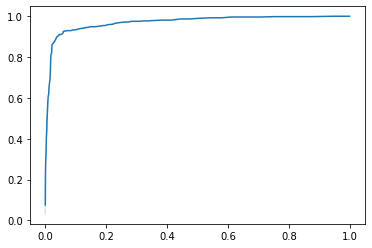

In [206]:
sns.lineplot(x=fpr, y=tpr);

In [208]:
print(roc_auc_score(y_test, proba))

0.9706059738524669


### 3.4 Otimização do modelo

In [210]:
rfn = RandomForestClassifier()

In [215]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
parametros = {'n_estimators':[50,100,110], 
              'max_depth':[23, 24, 25, 26] 
              } 

# instancia um objeto grid search
grid = GridSearchCV(rfn, parametros).fit(X_train, y_train)

print(f' Melhores parâmetros: {grid.best_params_}')
print(f'Melhor Score: {grid.best_score_}')

 Melhores parâmetros: {'max_depth': 25, 'n_estimators': 100}
Melhor Score: 0.9022005300747111


In [223]:
rfn.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
rfn.score(X_test, y_test)

0.9320769532783667

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.